# **Segmentation Analysis**

# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
car = pd.read_csv("/content/Car details v3.csv")

In [3]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.95 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# Data Details

In [4]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.95 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
car.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
car.shape

(8128, 13)

In [9]:
car.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


# Handling Missing Values

In [11]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

*Mileage Column*

In [12]:
car['mileage'].dtype

dtype('O')

In [13]:
ob = car['mileage'].unique()

In [14]:
ob

array(['23.95 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl', '26.2 km/kg

*Extract numerical values using regex*

In [15]:
car['mileage_cleaned'] = car['mileage'].str.extract('(\d+\.\d+)')  # Extracts numeric part
car['mileage_cleaned'] = pd.to_numeric(car['mileage_cleaned'], errors='coerce')  # Convert to float
#car['mileage_cleaned'] = car['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)

In [16]:
print("\nChecking for non-numeric values:")
print(car['mileage_cleaned'].apply(lambda x: isinstance(x, str)))


Checking for non-numeric values:
0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126    False
8127    False
Name: mileage_cleaned, Length: 8128, dtype: bool


In [17]:
 var1 = car['mileage_cleaned']

In [18]:
mean_mileage = var1.mean()
print(mean_mileage)

19.42358290122676


In [19]:
median_mileage = var1.median()
print(median_mileage)

19.3


In [20]:
mode_mileage = var1.mode()[0]
print(mode_mileage)

18.9


In [21]:
car['mileage_filled'] = var1.fillna(median_mileage)

In [22]:
missing_indices = car[car['mileage_cleaned'].isna()].index

In [23]:
filled_values = car.loc[missing_indices, 'mileage_filled']

In [24]:
print("\nFilled Values at Missing Indices (showing a few examples):")
print(filled_values.head())


Filled Values at Missing Indices (showing a few examples):
13     19.3
31     19.3
78     19.3
87     19.3
119    19.3
Name: mileage_filled, dtype: float64


In [25]:
#assert car['mileage_filled'].notna().all(), "There are still NaNs in 'mileage_filled'."


In [26]:
filled_values.isnull().sum()

0

In [27]:
car['mileage'] = car['mileage'].fillna(car['mileage_filled'])

In [28]:
car.drop(columns=['mileage_cleaned', 'mileage_filled'], inplace=True)

In [29]:
print("\nMissing Values in 'mileage' After Filling:")
print(car['mileage'].isnull().sum())


Missing Values in 'mileage' After Filling:
0


In [30]:
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,221


*Engine Column*

In [31]:
car['engine'].dtype

dtype('O')

In [32]:
car['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

*Extract numerical values using regex*

In [33]:
car['engine_cleaned'] = car['engine'].str.extract('(\d+)')
car['engine_cleaned'] = pd.to_numeric(car['engine_cleaned'], errors='coerce')

In [34]:
print("\nChecking for non-numeric values:")
print(car['engine_cleaned'].apply(lambda x: isinstance(x, str)))


Checking for non-numeric values:
0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126    False
8127    False
Name: engine_cleaned, Length: 8128, dtype: bool


In [35]:
valid_numeric_count = car['engine_cleaned'].notna().sum()
print(f"Valid numeric values count in 'engine_cleaned': {valid_numeric_count}")

Valid numeric values count in 'engine_cleaned': 7907


In [36]:
var2 = car['engine_cleaned']

In [37]:
mean_engine = var2.mean()
print(mean_engine)

1458.625015808777


In [38]:
median_engine = var2.median()
print(median_engine)

1248.0


In [39]:
mode_engine = var2.mode()
if not mode_engine.empty:
    print(mode_engine[0])
else:
    print("No mode found in the data.")

1248.0


In [40]:
car['engine_filled'] = car['engine_cleaned'].fillna(median_engine)

In [41]:
engine_filled_values = car.loc[missing_indices, 'engine_filled']

In [42]:
print("\nFilled Values at Missing Indices:")
print(engine_filled_values.head())


Filled Values at Missing Indices:
13     1248.0
31     1248.0
78     1248.0
87     1248.0
119    1248.0
Name: engine_filled, dtype: float64


In [43]:
engine_filled_values.isnull().sum()

0

In [44]:
car['engine']=car['engine'].fillna(car['engine_filled'])

In [45]:
car.drop(columns=['engine_cleaned', 'engine_filled'], inplace = True)

In [46]:
print("Missing values after filling:")
print(car['engine'].isnull().sum())

Missing values after filling:
0


In [47]:
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


*Handling missing values in Max Power column*

In [48]:
car['max_power'].dtype

dtype('O')

In [49]:
car['max_power']

,max_power
0,74 bhp
1,103.52 bhp
2,78 bhp
3,90 bhp
4,88.2 bhp
...,...
8123,82.85 bhp
8124,110 bhp
8125,73.9 bhp
8126,70 bhp


In [50]:
car["max_power"].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [51]:
car["max_power_cleaned"] = car["max_power"].str.extract('(\d+\.?\d*)')
car["max_power_cleaned"] = pd.to_numeric(car["max_power_cleaned"], errors="coerce")

In [52]:
print("\nChecking for non-numeric values:")
print(car['max_power_cleaned'].apply(lambda x: isinstance(x, str)))


Checking for non-numeric values:
0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126    False
8127    False
Name: max_power_cleaned, Length: 8128, dtype: bool


In [53]:
mean_power = car["max_power_cleaned"].mean()
median_power = car["max_power_cleaned"].median()
mode_power = car["max_power_cleaned"].mode()[0]

In [54]:
print("Mean : ",mean_power)
print("Median : ", median_power)
print("Mode: ", mode_power)

Mean :  91.51791898382203
Median :  82.0
Mode:  74.0


In [55]:
mean_pow = round(mean_power)

In [56]:
mean_pow

92

In [57]:
car["max_power_filled"] = car["max_power_cleaned"].fillna(mean_pow)

In [58]:
car["max_power_filled"].isnull().sum()

0

In [59]:
car["max_power"] = car["max_power"].fillna(car["max_power_filled"])

In [60]:
car["max_power"].isnull().sum()

0

In [61]:
car.drop(columns=["max_power_cleaned", "max_power_filled"], inplace=True)

In [62]:
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


*Handling missing values of Torque column*

In [63]:
car['torque'].dtype

dtype('O')

In [64]:
car['torque']

,torque
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,"12.7@ 2,700(kgm@ rpm)"
3,22.4 kgm at 1750-2750rpm
4,"11.5@ 4,500(kgm@ rpm)"
...,...
8123,113.7Nm@ 4000rpm
8124,"24@ 1,900-2,750(kgm@ rpm)"
8125,190Nm@ 2000rpm
8126,140Nm@ 1800-3000rpm


In [65]:
car['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

* Extract torque values using regex to capture numeric values before the "@" symbol*

In [66]:
car['torque_cleaned'] = car['torque'].str.extract(r'(\d+\.?\d*)\s*Nm')
car['torque_cleaned'] = pd.to_numeric(car['torque_cleaned'], errors='coerce')

In [67]:
torque_mean = car['torque_cleaned'].mean()
torque_median = car['torque_cleaned'].median()
torque_mode = car['torque_cleaned'].mode()[0]

In [68]:
print(torque_mean)
print(torque_median)
print(torque_mode)

178.01058320482267
171.0
200.0


In [69]:
car['torque_filled']= car['torque_cleaned'].fillna(torque_mode)

In [70]:
car['torque_filled'].isnull().sum()

0

In [71]:
car['torque'] = car['torque'].fillna(car['torque_filled'])

In [72]:
car['torque'].isnull().sum()

0

In [73]:
car.drop(columns=['torque_cleaned', 'torque_filled'], inplace = True)

In [74]:
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
# Check if the columns exist before dropping
if 'torque_cleaned' in car.columns and 'torque_filled' in car.columns:
    car.drop(columns=['torque_cleaned', 'torque_filled', 'torque_mean', 'torque_median', 'torque_mode'], inplace = True)
else:
    print("One or more columns not found in the DataFrame.")
    # Optionally, print the existing columns for verification
    print(car.columns)

One or more columns not found in the DataFrame.
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [75]:
# List of mistakenly added columns
columns_to_remove = ['torque_mean', 'torque_median', 'torque_mode']
car = car.drop(columns=columns_to_remove, errors='ignore')
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


*Handling Missing Data in Seats Column*

In [76]:
car['seats'].dtype

dtype('float64')

In [77]:
car['seats']

,seats
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
8123,5.0
8124,5.0
8125,5.0
8126,5.0


In [78]:
car['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [79]:
car['seats'].isnull().sum()

221

In [80]:
mean_seats = car['seats'].mean()
median_seats = car['seats'].median()
mode_seats = car['seats'].mode()[0]

In [81]:
print("Mean : ", mean_seats)
print("Median: ", median_seats)
print("Mode: ", mode_seats)

Mean :  5.41671936259011
Median:  5.0
Mode:  5.0


In [82]:
car['seats_filled'] = car['seats'].fillna(mode_seats)

In [83]:
car['seats_filled'].isnull().sum()

0

In [84]:
car['seats']=car['seats'].fillna(car['seats_filled'])

In [85]:
car.drop(columns = ['seats_filled'], inplace = True)

In [86]:
car['seats'].isnull().sum()

0

In [87]:
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [88]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [89]:
car['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

*Fuel Column*

In [90]:
car['fuel']

,fuel
0,Diesel
1,Diesel
2,Petrol
3,Diesel
4,Petrol
...,...
8123,Petrol
8124,Diesel
8125,Diesel
8126,Diesel


In [91]:
car['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

*Initalizing Label Encoder*

In [92]:
label_encoder = LabelEncoder()

In [93]:
car['fuel'] = label_encoder.fit_transform(car['fuel'])

In [94]:
car['fuel'].unique()

array([1, 3, 2, 0])

In [95]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [96]:
car['name']

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel
4,Maruti Swift VXI BSIII
...,...
8123,Hyundai i20 Magna
8124,Hyundai Verna CRDi SX
8125,Maruti Swift Dzire ZDi
8126,Tata Indigo CR4


In [97]:
car['year']

,year
0,2014
1,2014
2,2006
3,2010
4,2007
...,...
8123,2013
8124,2007
8125,2009
8126,2013


In [98]:
car['selling_price']

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


In [99]:
car['km_driven']

,km_driven
0,145500
1,120000
2,140000
3,127000
4,120000
...,...
8123,110000
8124,119000
8125,120000
8126,25000


In [100]:
car['seller_type']

,seller_type
0,Individual
1,Individual
2,Individual
3,Individual
4,Individual
...,...
8123,Individual
8124,Individual
8125,Individual
8126,Individual


In [101]:
car['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [102]:
car['seller_type'] = label_encoder.fit_transform(car['seller_type'])

In [103]:
car['seller_type'].unique()

array([1, 0, 2])

*Transmission Column*

In [104]:
car['transmission']

,transmission
0,Manual
1,Manual
2,Manual
3,Manual
4,Manual
...,...
8123,Manual
8124,Manual
8125,Manual
8126,Manual


In [105]:
car['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [106]:
car['transmission'] = label_encoder.fit_transform(car['transmission'])

In [107]:
car['transmission'].unique()

array([1, 0])

*Owner Column*

In [108]:
car['owner']

,owner
0,First Owner
1,Second Owner
2,Third Owner
3,First Owner
4,First Owner
...,...
8123,First Owner
8124,Fourth & Above Owner
8125,First Owner
8126,First Owner


In [109]:
car['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [110]:
car['owner'] = label_encoder.fit_transform(car['owner'])

In [111]:
car['owner'].unique()

array([0, 2, 4, 1, 3])

# Visualizing

In [112]:
fuel_counts = car['fuel'].value_counts()

In [113]:
fuel_counts

,count
fuel,
1,4402
3,3631
0,57
2,38


<ipython-input-114-7ec1fdd3cc0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='viridis')


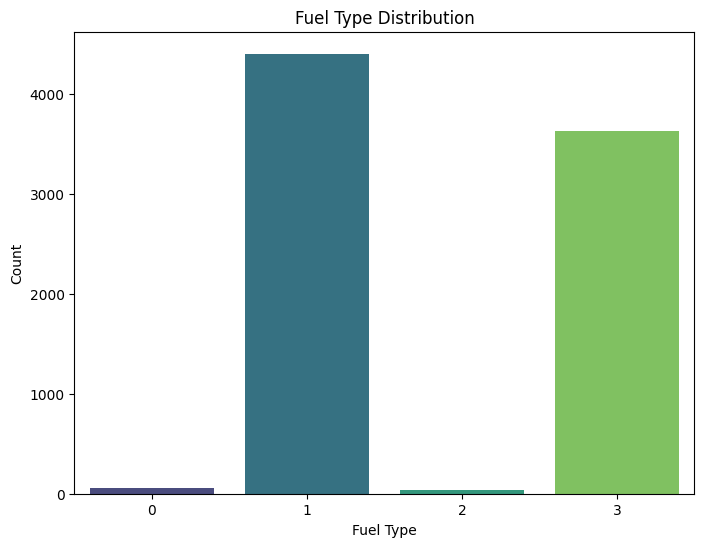

In [114]:
plt.figure(figsize=(8, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='viridis')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

The most common fuel type is Diesel, followed by Petrol. CNG and LPG are less common. There's a significant difference in the number of cars using Diesel compared to Petrol. Alternative fuel types like CNG and LPG have a relatively small presence in the dataset.

*Plot for 'seller_type'*

In [115]:
seller_type_counts = car['seller_type'].value_counts()

In [116]:
seller_type_counts

,count
seller_type,
1,6766
0,1126
2,236


<ipython-input-117-311042164700>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car, x='seller_type', palette=palette)


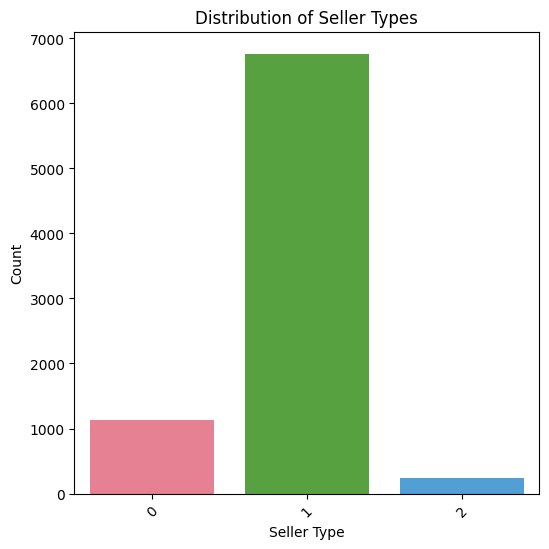

In [117]:
palette = sns.color_palette("husl", n_colors=len(car['seller_type'].unique()))
plt.figure(figsize=(6, 6))
sns.countplot(data=car, x='seller_type', palette=palette)
plt.title('Distribution of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The majority of car listings are from individual sellers, indicating a strong presence of private sellers in the used car market.
Dealership listings are considerably fewer, suggesting a preference for direct seller-to-buyer transactions.
Trustmark dealers constitute the smallest proportion, implying a limited adoption of certified pre-owned programs or a focus on direct sales.


*Owner Column*

In [118]:
owner_counts = car['owner'].value_counts()
owner_counts

,count
owner,
0,5289
2,2105
4,555
1,174
3,5


<ipython-input-119-0c4f50cc6f83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car, x='owner', palette=palette)
<ipython-input-119-0c4f50cc6f83>:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=car, x='owner', palette=palette)


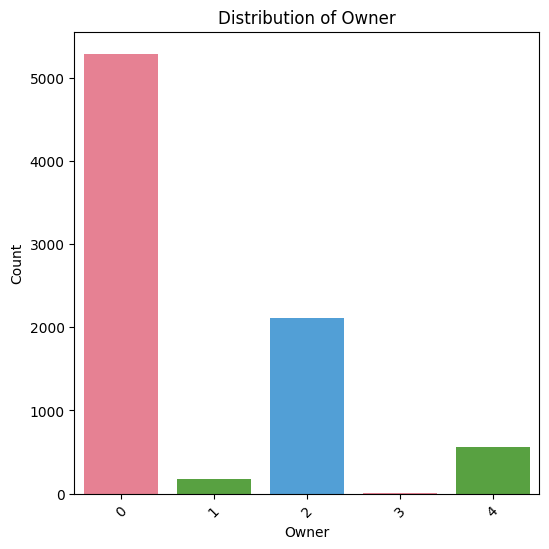

In [119]:
palette = sns.color_palette("husl", n_colors=len(car['seller_type'].unique()))
plt.figure(figsize=(6, 6))
sns.countplot(data=car, x='owner', palette=palette)
plt.title('Distribution of Owner')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The used car market is dominated by cars with a single previous owner, indicating a high turnover rate for vehicles within the first ownership cycle.
Cars with two or three previous owners are less common, suggesting a gradual decline in resale value as ownership changes hands.
Vehicles with four or more previous owners are relatively rare, likely due to decreased demand for cars with extensive ownership history.

*Transmission Column*

In [120]:
transmission_counts = car['transmission'].value_counts()
transmission_counts

,count
transmission,
1,7078
0,1050


<ipython-input-121-039f92607bd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='viridis')


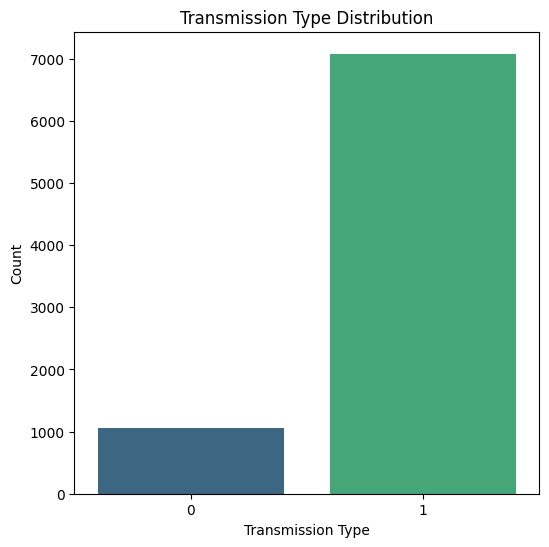

In [121]:
plt.figure(figsize=(6, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='viridis')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

The used car market shows a clear preference for manual transmissions, with a significantly larger number of cars listed as manual compared to automatic.
This suggests that buyers in this market may prioritize affordability or driving engagement, which are often associated with manual transmissions.
The lower number of automatic cars could reflect a higher initial cost or a perception of lower fuel efficiency compared to manual counterparts.

*Year Column*

In [122]:
year_counts = car['year'].value_counts().sort_index()

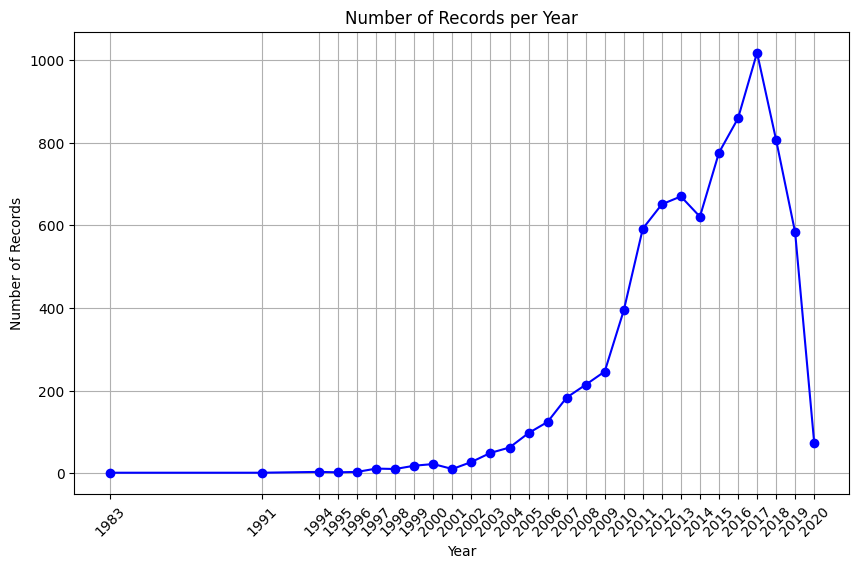

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='b')
plt.title('Number of Records per Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.grid(True)
plt.xticks(year_counts.index, rotation=45)
plt.show()

The number of car listings generally increases with the year of manufacture, indicating a growing trend in the used car market.
There's a notable increase in listings for cars manufactured after 2010, suggesting a potential increase in the availability of newer used cars.
This could be attributed to factors like shorter ownership cycles, increased vehicle production, or a shift towards newer models in the used car market.


*Name Column*

In [124]:
name_counts = car['name'].value_counts()
name_counts

,count
name,
Maruti Swift Dzire VDI,129
Maruti Alto 800 LXI,82
Maruti Alto LXi,71
BMW X4 M Sport X xDrive20d,62
Maruti Swift VDI,61
...,...
Skoda Fabia 1.4 TDI Ambiente,1
Mahindra Scorpio VLX 2WD AT BSIII,1
Renault KWID Climber 1.0 AMT,1


In [125]:
top_n = 10
top_name_counts = name_counts.head(top_n)

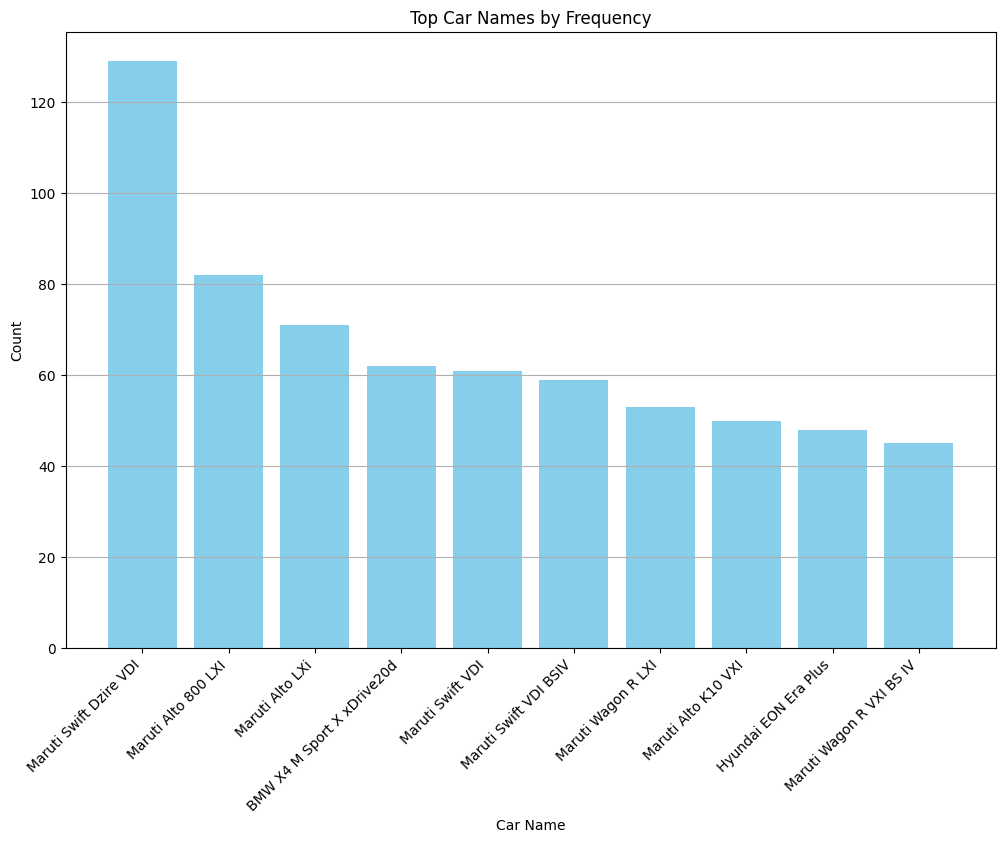

In [126]:
plt.figure(figsize=(12, 8))
plt.bar(top_name_counts.index, top_name_counts.values, color='skyblue')
plt.title('Top Car Names by Frequency')
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

The bar chart illustrates the top 10 most frequently listed car names in the dataset.
Maruti Swift Dzire VDI emerges as the most popular model, significantly exceeding other listed cars.
This suggests a strong preference for this specific model in the used car market.
Other Maruti models, such as Swift, Wagon R, and Alto, also feature prominently, indicating the brand's dominance in this market segment.
The presence of Hyundai models like i10 and Grand i10 further highlights the popularity of these brands among used car buyers.
This insight can be valuable for car dealerships and sellers to understand market demand and tailor their inventory or marketing strategies accordingly.

*Seats Column*

In [127]:
seats_counts = car['seats'].value_counts().sort_index()

In [128]:
seats_counts

,count
seats,
2.0,2
4.0,133
5.0,6475
6.0,62
7.0,1120
8.0,236
9.0,80
10.0,19
14.0,1


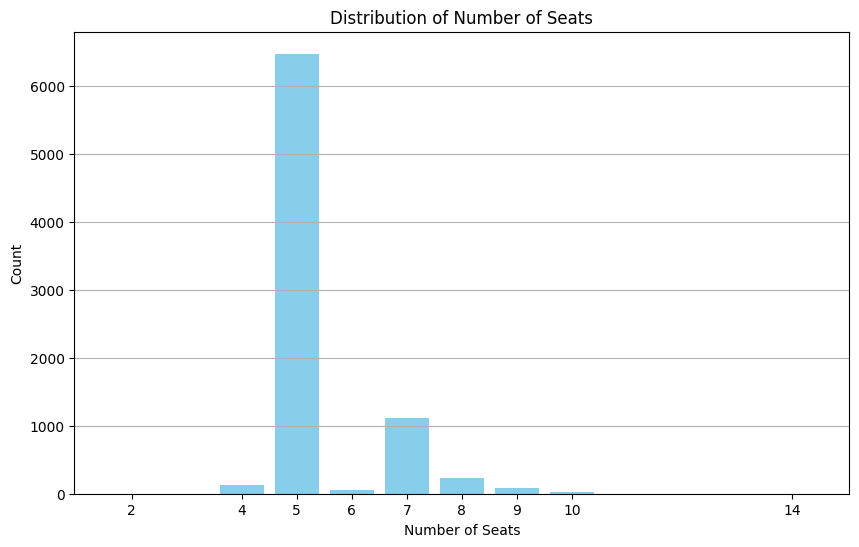

In [129]:
plt.figure(figsize=(10, 6))
plt.bar(seats_counts.index, seats_counts.values, color='skyblue')
plt.title('Distribution of Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.xticks(seats_counts.index)
plt.grid(axis='y')
plt.show()

The majority of cars listed in the dataset have 5 seats, indicating a strong preference for standard passenger vehicles in the used car market.
Cars with 7 seats are the second most common, suggesting a significant demand for vehicles with larger passenger capacity, likely from families or individuals requiring additional space.
Cars with 8 seats are relatively less common, possibly due to their association with larger, more expensive vehicles.
Cars with fewer than 5 seats are relatively rare, indicating a limited market for smaller or specialty vehicles in this dataset.


In [160]:
avg_price_per_year = car.groupby('year')['selling_price'].mean().reset_index()

In [161]:
avg_price_per_year = avg_price_per_year.sort_values(by='year')

<ipython-input-162-d9e77f2bb222>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




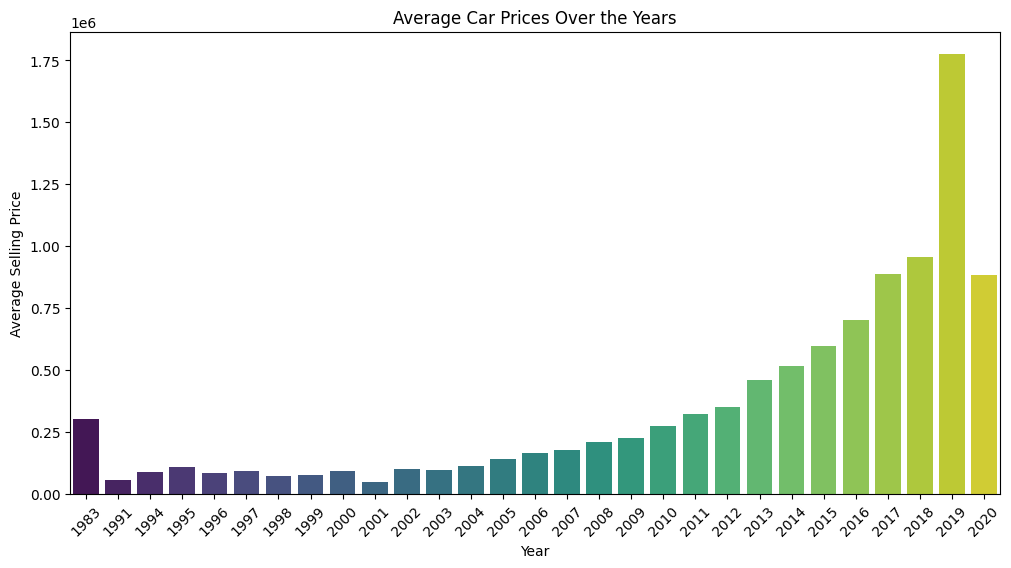

In [162]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='selling_price', data=avg_price_per_year, palette='viridis')
plt.title('Average Car Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

The average selling price of cars generally increases with the year of manufacture.
This aligns with the expectation that newer cars command higher prices in the used car market due to factors like improved technology, features, and remaining lifespan.
There's a notable jump in average prices for cars manufactured after 2010, suggesting a potential premium associated with newer used cars.
The trend highlights the depreciation of car values over time, with older cars generally fetching lower prices compared to their newer counterparts.


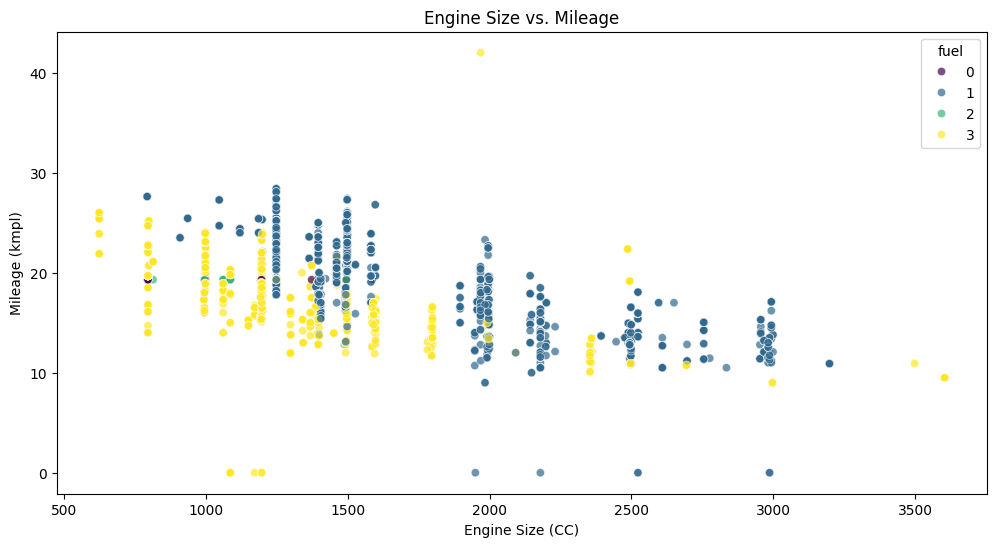

In [163]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='engine', y='mileage', data=car, hue='fuel', palette='viridis', alpha=0.7)
plt.title('Engine Size vs. Mileage')
plt.xlabel('Engine Size (CC)')
plt.ylabel('Mileage (kmpl)')
plt.show()

The scatter plot reveals a general trend: cars with smaller engine sizes tend to have better mileage (higher kmpl).

This aligns with the principle that smaller engines generally consume less fuel, leading to improved fuel efficiency.

However, there is considerable variation within each fuel type, indicating that other factors like driving habits, vehicle weight, and technology also influence mileage.

The clustering of points suggests that certain engine size ranges are more common for specific fuel types.

For instance, diesel cars (represented in a darker shade) seem to cluster around a higher engine size range compared to petrol cars.

This might indicate a preference for larger engines in diesel vehicles, possibly due to their torque characteristics or intended usage (e.g., hauling heavier loads).


# Normalize or standardize numerical features.

In [130]:
# Checking if there are any NaNs left in the key columns
assert car[['mileage', 'engine', 'max_power', 'torque']].notna().all().all(), "There are still NaNs in the dataset."

In [131]:
car['engine'] = car['engine'].astype(str).str.replace(' CC', '', regex=False)
car['engine'] = pd.to_numeric(car['engine'], errors='coerce')

In [132]:
car['max_power'] = car['max_power'].astype(str).str.replace(' bhp', '', regex=False)
car['max_power'] = pd.to_numeric(car['max_power'], errors='coerce')

In [133]:
car['mileage'] = car['mileage'].astype(str)
car['mileage'] = pd.to_numeric(car['mileage'].str.replace(' kmpl', ''), errors='coerce')

In [134]:
car['torque'] = car['torque'].astype(str)
car['torque'] = pd.to_numeric(car['torque'].str.replace(' Nm', ''), errors='coerce')

In [135]:
features = ['selling_price', 'km_driven', 'year', 'mileage', 'engine', 'max_power', 'torque', 'seats']
X = car[features]

In [136]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [137]:
print(np.isnan(X_scaled).sum())

7995


In [138]:
print(np.isnan(X_scaled).sum(axis=0))

[   0    0    0   88    0    1 7906    0]


In [139]:
# Fill missing values with mean or median for numerical columns
car['mileage'].fillna(car['mileage'].median(), inplace=True)
car['engine'].fillna(car['engine'].median(), inplace=True)
car['max_power'].fillna(car['max_power'].median(), inplace=True)
car['torque'].fillna(car['torque'].mode()[0], inplace=True)  # If mode is appropriate
car['seats'].fillna(car['seats'].median(), inplace=True)


In [140]:
print(car.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [141]:
X = car[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']]
print(X.dtypes)
print(X.isnull().sum())

year               int64
selling_price      int64
km_driven          int64
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object
year             0
selling_price    0
km_driven        0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [142]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(np.isnan(X_scaled).sum(axis=0))

[0 0 0 0 0 0 0 0]


In [143]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

# *Segmentation Analysis*

*Elbow curve*

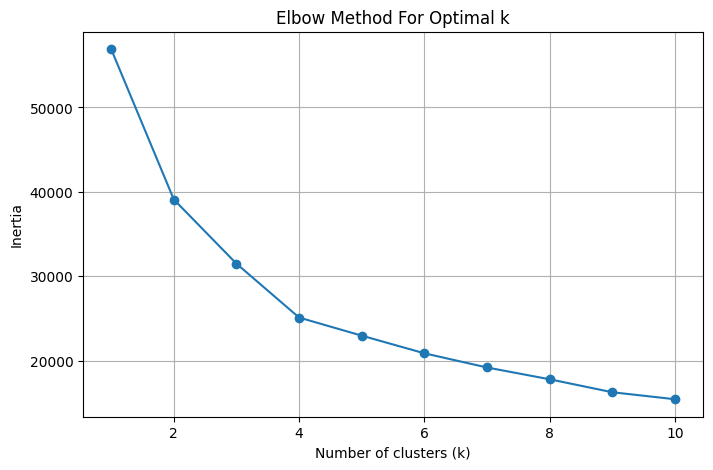

In [144]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

The elbow method is a heuristic used in determining the number of clusters in a data set.
The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.
In this case, the elbow of the curve appears to be at k=3, suggesting that 3 clusters may be optimal for this dataset.


In [145]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)
car['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


*Analyze the Clusters:*

In [146]:
#cluster_summary = car.groupby('Cluster').mean()
#print(cluster_summary)
#cluster_counts = car['Cluster'].value_counts()
#print(cluster_counts)

In [147]:
numeric_columns = car.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = car.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)


                year  selling_price      km_driven      fuel  seller_type  \
Cluster                                                                     
0        2013.706918   4.250050e+05   65362.741987  2.074738     0.914948   
1        2017.354978   3.358634e+06   29733.268398  1.476190     0.426407   
2        2013.049853   7.022016e+05  103988.426686  1.183284     0.934751   

         transmission     owner    mileage       engine   max_power  torque  \
Cluster                                                                       
0            0.927801  0.829737  20.681117  1229.039829   79.581419   200.0   
1            0.069264  0.147186  16.927100  2182.833333  185.313182   200.0   
2            0.879032  0.969208  14.268526  2239.939883  114.967801   200.0   

            seats  
Cluster            
0        5.064424  
1        5.123377  
2        7.076246  


**Cluster 0:** Represents the "Economy" segment, with older, more affordable cars that have been driven more and offer less power.

**Cluster 1:** Represents the "Mid-Range" segment, with cars that balance age, price, features, and performance.

**Cluster 2:** Represents the "Luxury/Performance" segment, with newer, more expensive cars that offer better performance and potentially more space.

In [148]:
from sklearn.decomposition import PCA

In [149]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

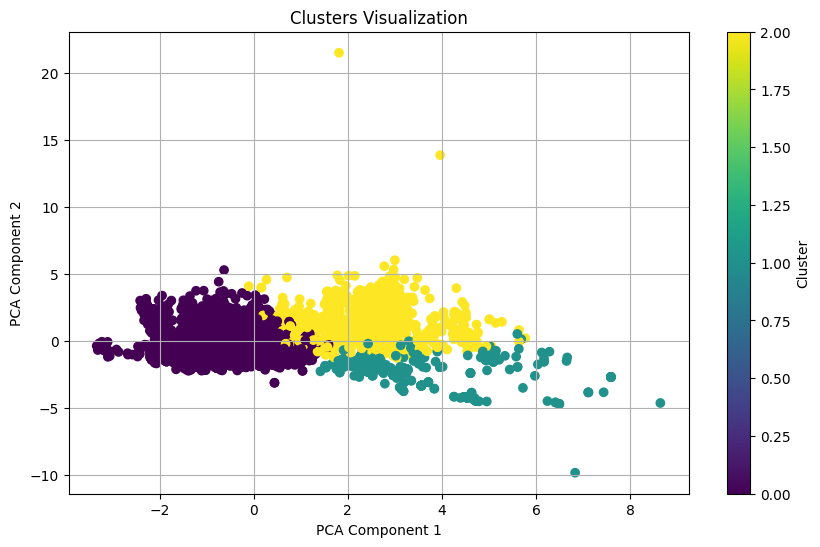

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=car['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**Cluster 0 (purple)** is mostly concentrated on the left side, suggesting these cars have lower values for the features captured by PCA component 1.

**Cluster 1 (green)** occupies the middle ground, indicating a balance of features.

**Cluster 2 (yellow)** is spread out on the right, suggesting higher values for the features captured by PCA component 1, possibly indicating newer and more expensive cars.

In [151]:
from mpl_toolkits.mplot3d import Axes3D

In [152]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [153]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = car['Cluster']

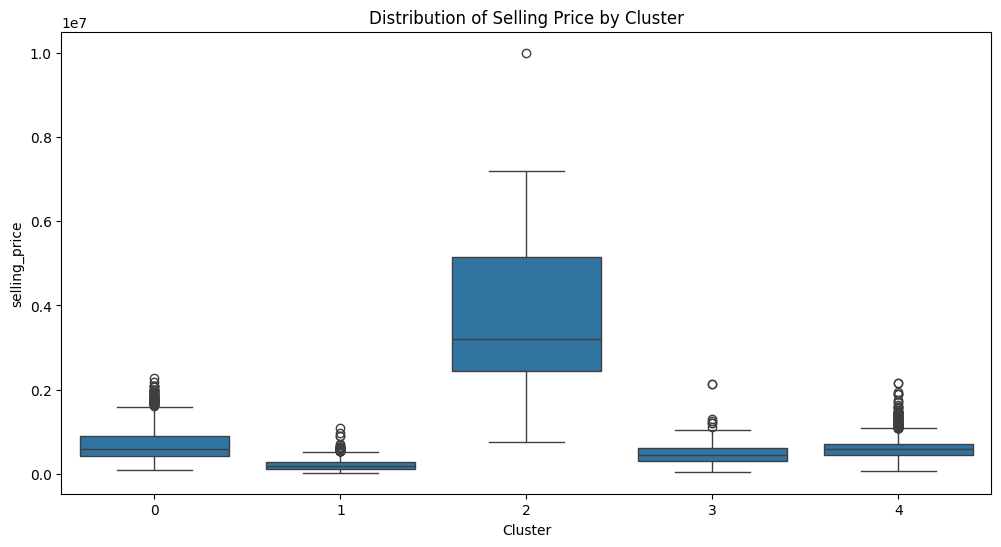

In [158]:
car_with_clusters = car.copy()
car_with_clusters['Cluster'] = clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='selling_price', data=car_with_clusters)
plt.title('Distribution of Selling Price by Cluster')
plt.show()

Cluster 2 has the highest median selling price, followed by Cluster 1 and then Cluster 0. This suggests a clear price segmentation among the clusters, aligning with the 'Luxury/Performance', 'Mid-Range', and 'Economy' interpretations respectively.


In [155]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [156]:
car_with_clusters = car.copy()
car_with_clusters['Cluster'] = clusters

<Figure size 1800x1500 with 0 Axes>

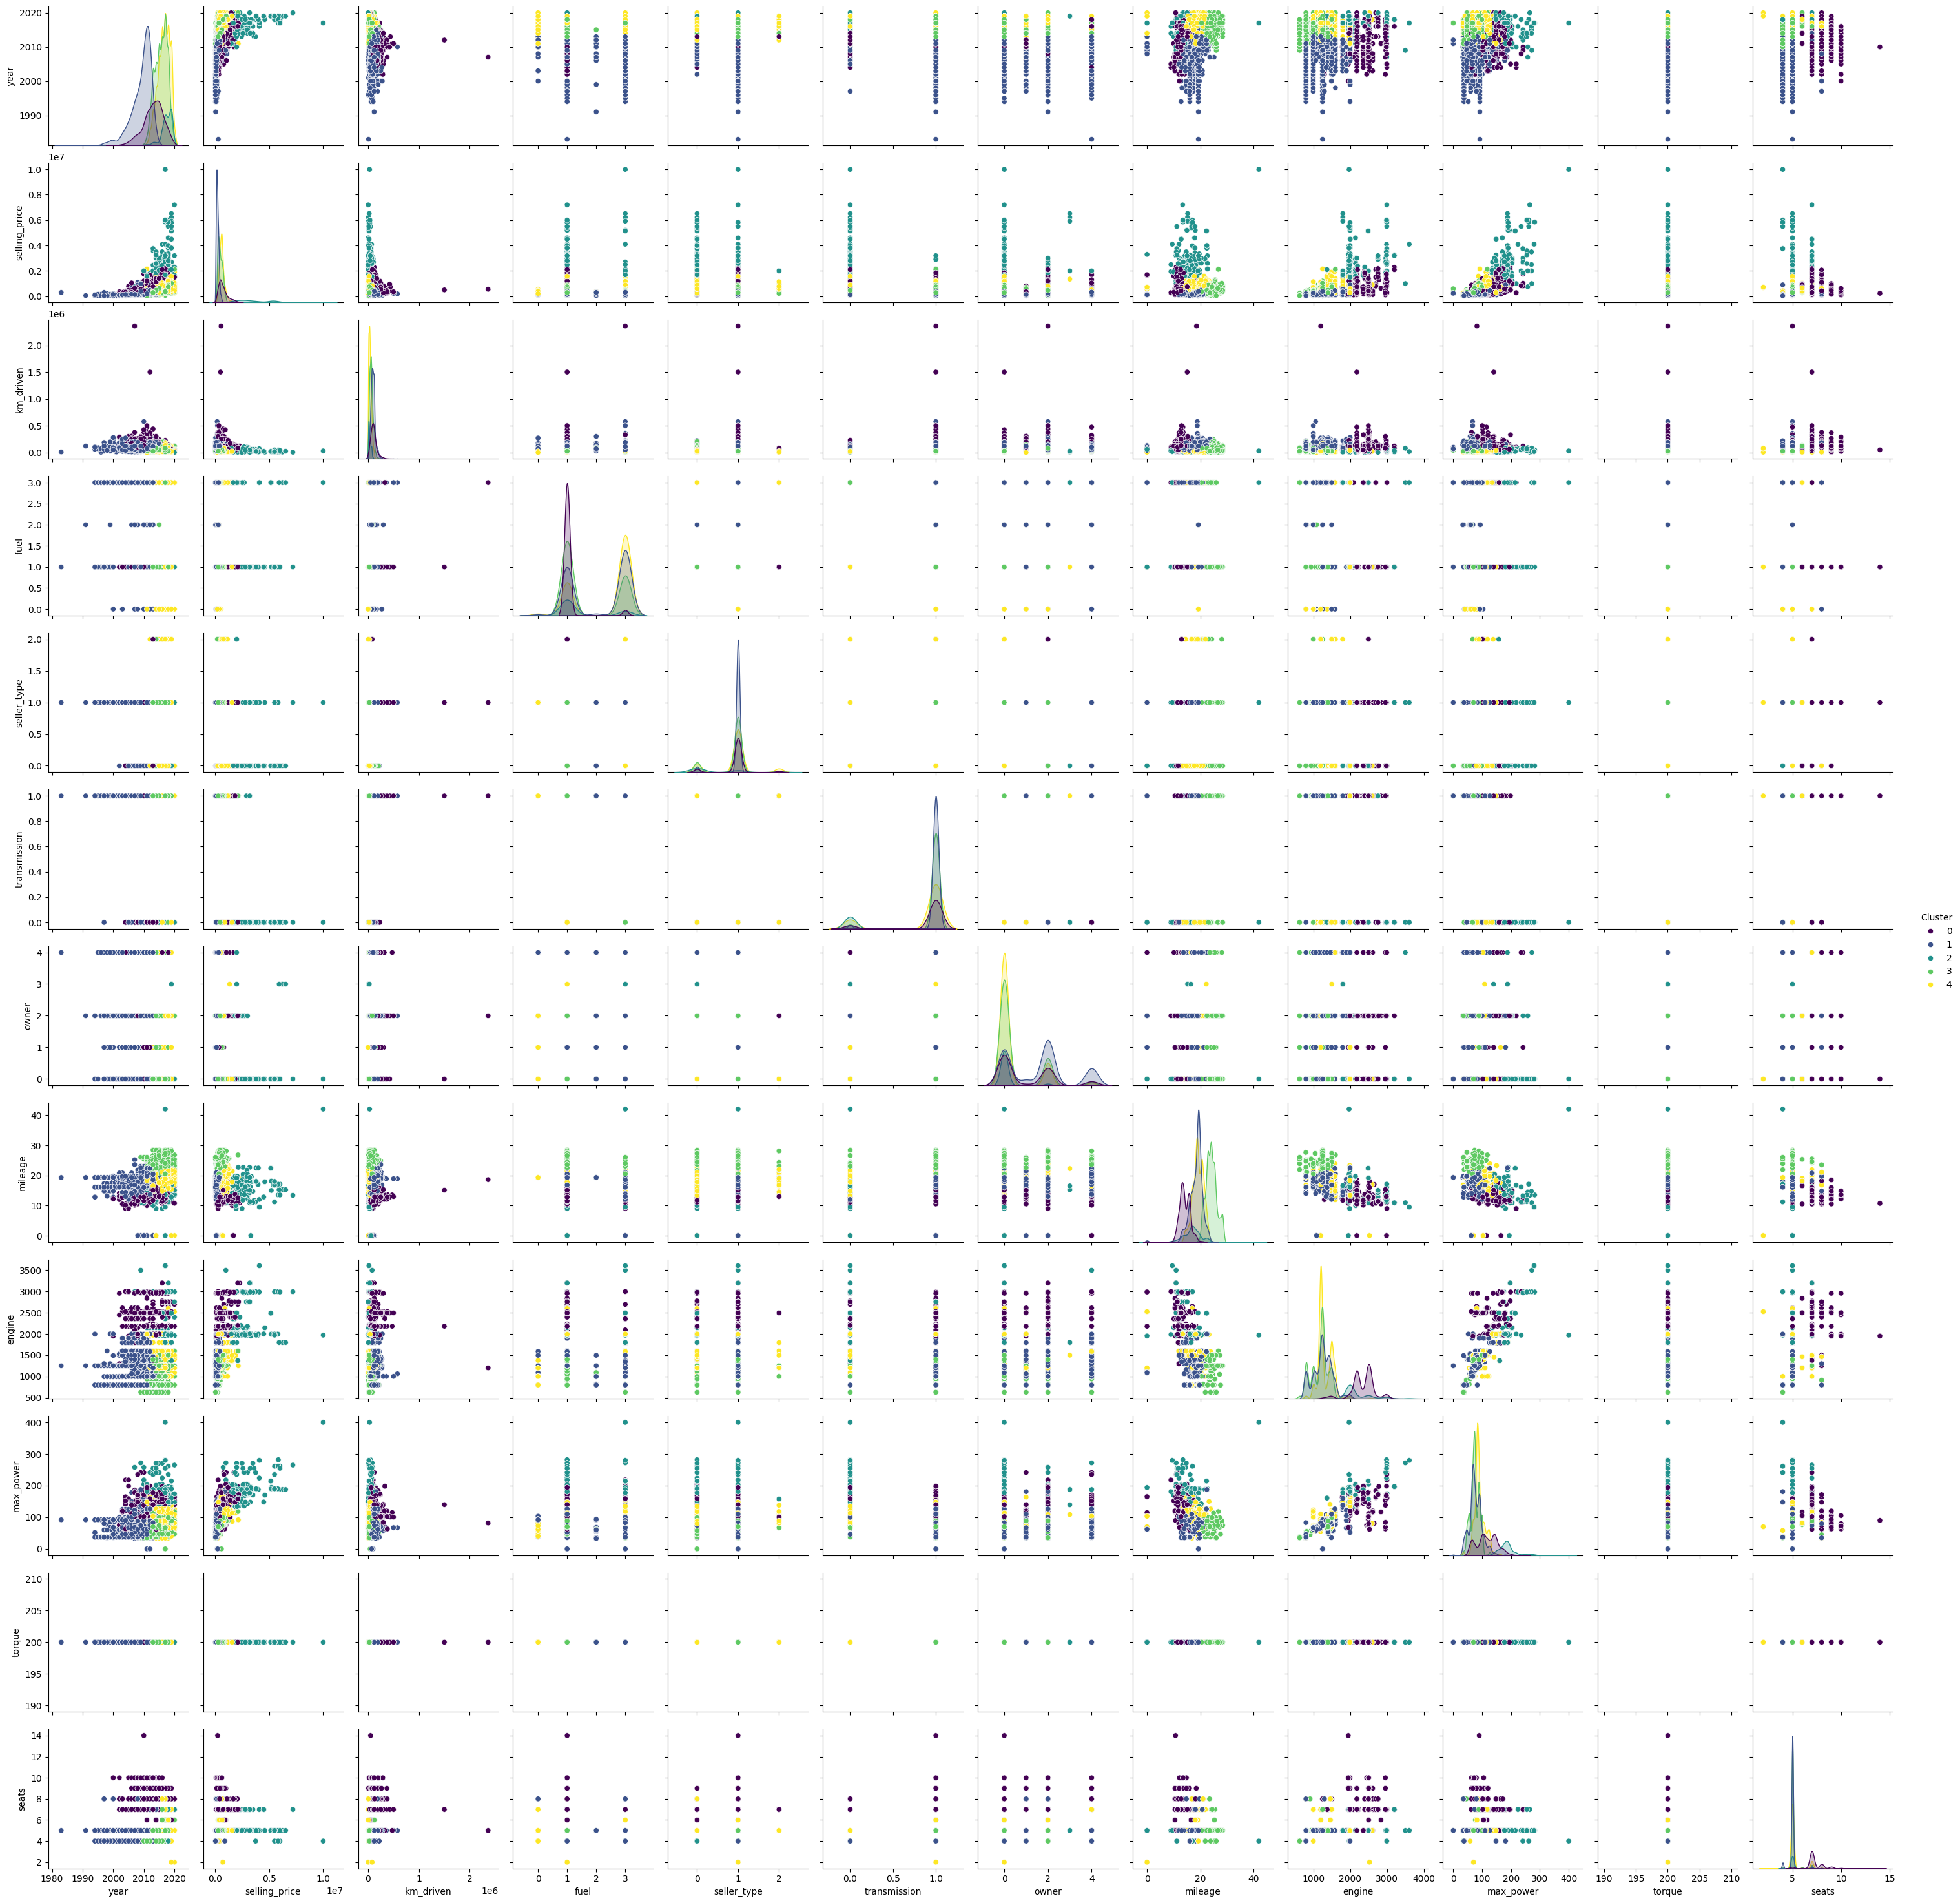

In [157]:
plt.figure(figsize=(18, 15))
sns.pairplot(car_with_clusters, hue='Cluster', palette='viridis')
plt.show()

**Selling Price vs. Year:** Newer cars generally have higher selling prices, with a noticeable jump in prices for cars from 2010 onwards.

**Selling Price vs. Km Driven:** Cars with lower mileage tend to have higher selling prices.

**Selling Price vs. Engine:** There's a positive correlation between engine size and selling price.

**Selling Price vs. Max Power:** More powerful cars generally command higher prices.

**Selling Price vs. Torque:** Higher torque values are associated with higher selling prices.

**Selling Price vs. Seats:** Cars with 7 seats tend to have higher prices compared to 5-seater cars.

**Mileage vs. Year:** Newer cars generally offer better mileage.

**Mileage vs. Engine:** Smaller engines tend to offer better mileage.

**Engine vs. Max Power:** Larger engines generally produce more power.

**Engine vs. Torque:** Larger engines typically generate more torque.


In [159]:
import plotly.express as px
fig = px.scatter_matrix(car_with_clusters, dimensions=['mileage', 'engine', 'max_power', 'torque'], color='Cluster', title='Scatter Matrix of Clusters')
fig.update_layout(width=1200, height=1000)
fig.show()

**Cluster Characteristics:**

Cluster 0 (purple): Characterized by lower mileage, smaller engines, and lower power/torque.

Cluster 1 (green): Shows a mix of attributes across the dimensions.

Cluster 2 (yellow): Tends towards higher mileage, larger engines, and greater power/torque.

Cluster 3 (blue): Exhibits a pattern similar to Cluster 0 but with slightly higher values.

Cluster 4 (red): Shows a concentration of data points with moderate mileage and engine size.

**Relationships between Variables:**

Mileage and Engine: There's a negative correlation, indicating smaller engines tend to offer better mileage.

Engine and Max Power/Torque: Positive correlations suggest larger engines generally produce more power and torque.

# Dataset

The dataset used in this project includes the following columns:
- `name`: Car model name
- `year`: Year of manufacture
- `selling_price`: Selling price of the car
- `km_driven`: Kilometers driven
- `fuel`: Fuel type (Diesel, Petrol, LPG, CNG)
- `seller_type`: Seller type (Individual, Dealer, Trustmark Dealer)
- `transmission`: Transmission type (Manual, Automatic)
- `owner`: Number of previous owners
- `mileage`: Mileage of the car
- `engine`: Engine capacity in CC
- `max_power`: Maximum power in BHP
- `torque`: Torque of the car
- `seats`: Number of seats

# **Data Cleaning and Preprocessing:**

The code effectively handles missing values in crucial columns like 'mileage', 'engine', 'max_power', 'torque', and 'seats' using appropriate imputation techniques (mean, median, mode).

Categorical features like 'fuel', 'seller_type', 'transmission', and 'owner' are encoded numerically using LabelEncoder, preparing them for modeling.


# **Exploratory Data Analysis (EDA):**
- *Visualizations provide insights into the distribution of various features:*
   - Fuel type: Diesel is the most common, followed by Petrol.
   - Seller type: Individual sellers dominate the market.
   - Ownership: Most cars have a single previous owner.
   - Transmission: Manual transmissions are preferred.
   - Year: Listings increase with the year of manufacture.
   - Car names: Maruti Swift Dzire VDI is the most popular model.
   - Seats: 5-seater cars are the most common.

# **Segmentation:**
   - Performed K-Means clustering to group similar cars based on selected features.
   - Evaluated cluster quality using the elbow method to choose the optimal number of clusters

# **Key Trends and Observations:**
- The used car market prefers diesel cars with manual transmissions.
- Individual sellers play a significant role in the market.
- Newer cars generally command higher prices.
- A growing trend of newer used cars is entering the market

# **Further Analysis and Modeling:**
- The cleaned and preprocessed data can be used for further analysis, such as:
- Investigating the relationship between price and other features (mileage, engine size, etc.).
- Building predictive models to estimate car prices.
- Segmenting the market based on customer preferences.

# **Recommendations:**
- Car dealerships and sellers can leverage these insights to optimize their inventory and pricing strategies.
- Buyers can make informed decisions based on the prevalent trends in the used car market.